In [1]:
import numpy as np
import numpy.ma as ma
import pylab as pl
import pylab as pl
import matplotlib.patches as mpatches
import gdal
%matplotlib inline

# Loading a landsat 8 band

In [2]:
def normalize(data):
    #Divide an image by its mean to create a normalized image with unity mean
    image_mean = np.mean(data)
    norm = data/image_mean
    #re-normalizing to have a range between 0-1
    difference = norm-norm.min()
    range = norm.max() - norm.min()
    normalized_values = difference/range
    return normalized_values
    

In [3]:
def crop(data):
    temp = data[3500:5100]
    temp_transpose = temp.transpose()
    temp = temp_transpose[3000:4600]
    temp_transpose = temp.transpose()    
    return temp_transpose
    

In [5]:
#
#def divide(data):
#    s=0
#    chunks = [[[0 for k in xrange(16)] for j in xrange(16)] for i in xrange(16)]
#    while (s < 16):  
#        temp = data[(s*100):(s*100)+99]
#        temp_transpose = temp.transpose()
#        temp = temp_transpose[(s*100):(s*100)+99]
#        temp_transpose = temp.transpose() 
#        chunks[s]=temp_transpose
#        print s
#        s=s+1
#    return chunks


In [32]:
# To create smaller 16x16 chunks of data which we need to paas to keras
def divide(data):
    s=0
    
    chunks = [[[[0 for k in xrange(16)] for j in xrange(16)] for i in xrange(16)]for h in xrange(16)]
    while (s < 16):  
        temp = data[(s*100):(s*100)+99]
        temp_transpose = temp.transpose()
        t=0
        while (t < 16):
            temp = temp_transpose[(t*100):(t*100)+99]
            temp_transpose1 = temp.transpose() 
            chunks[s][t]=temp_transpose1
            t=t+1
        #print s
        s=s+1
        #t=t+1
    return chunks


(7332L, 7142L) int16
float64


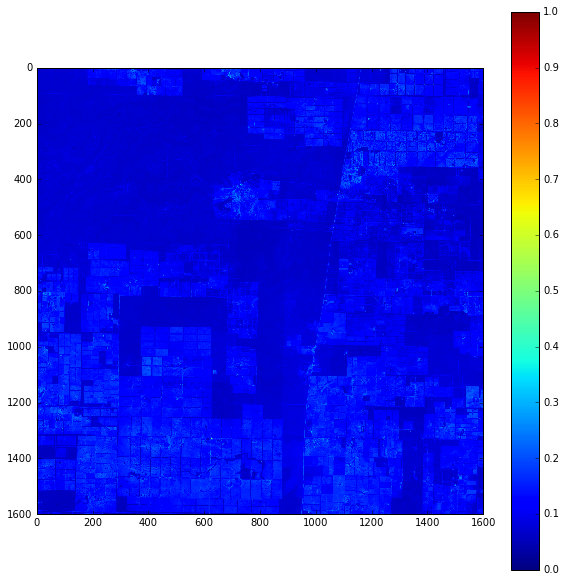

In [34]:
ds1 = gdal.Open('../l8_b1.tif')
nodataval1 = ds1.GetRasterBand(1).GetNoDataValue()
data_b1 = ds1.ReadAsArray()
del ds1
data_b1 = ma.masked_where(data_b1 == nodataval1, data_b1)

print data_b1.shape, data_b1.dtype

pl.figure(figsize=(10, 10))

cropped_b1 = crop(data_b1)
normalized_b1 = normalize(cropped_b1)
print normalized_b1.dtype
pl.imshow(normalized_b1,interpolation="none")
#pl.imshow(data_b1)
pl.colorbar()

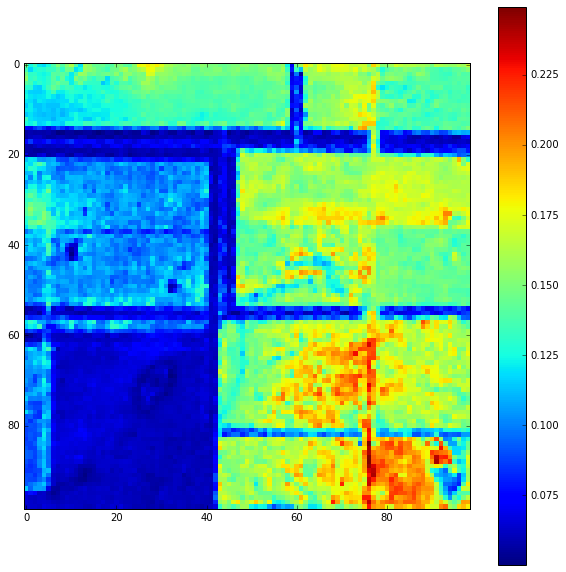

In [44]:
b1=divide(normalized_b1)
pl.figure(figsize=(10, 10))
pl.imshow(b1[13][1],interpolation="none")
pl.colorbar()
#only diagonal is working-probably I need 4d array


In [84]:
count = 0
while (count < 9):
    print 'The count is:', count
    count = count + 1

print "Good bye!"

The count is: 0
The count is: 1
The count is: 2
The count is: 3
The count is: 4
The count is: 5
The count is: 6
The count is: 7
The count is: 8
Good bye!


-9999.0
(7332L, 7142L) int16


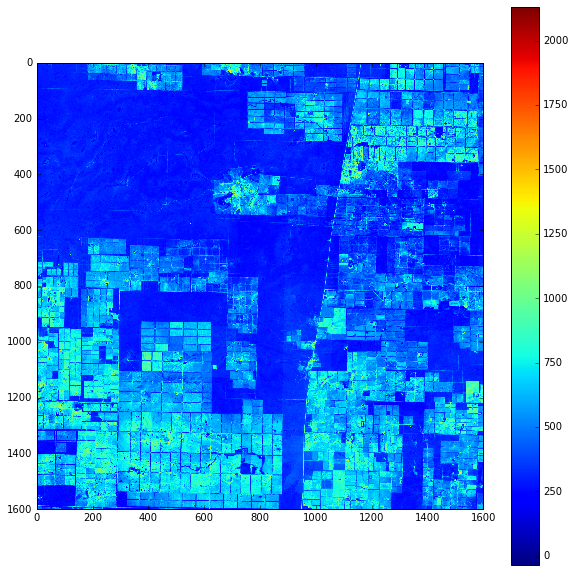

In [8]:
ds2 = gdal.Open('../l8_b2.tif')
nodataval2 = ds2.GetRasterBand(1).GetNoDataValue()
data_b2 = ds2.ReadAsArray()
del ds2
data_b2 = ma.masked_where(data_b2 == nodataval2, data_b2)
print nodataval2
print data_b2.shape, data_b2.dtype
pl.figure(figsize=(10, 10))

cropped_b2 = crop(data_b2)
normalized_b2 = normalize(cropped_b2)
pl.imshow(cropped_b2,interpolation="none")

#pl.imshow(data_b2)
pl.colorbar()

-9999.0
(7332L, 7142L) int16


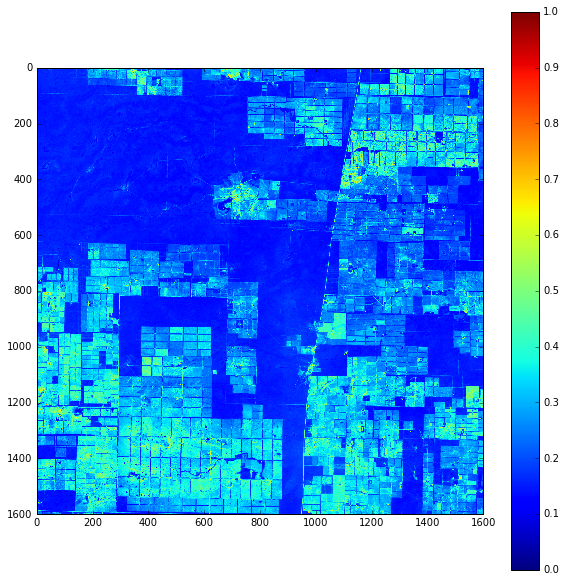

In [9]:
ds3 = gdal.Open('../l8_b3.tif')
nodataval3 = ds3.GetRasterBand(1).GetNoDataValue()
data_b3 = ds3.ReadAsArray()
del ds3
data_b3 = ma.masked_where(data_b3 == nodataval3, data_b3)
print nodataval3
print data_b3.shape, data_b3.dtype
pl.figure(figsize=(10, 10))
cropped_b3 = crop(data_b3)   
normalized_b3 = normalize(cropped_b3)
pl.imshow(normalized_b3,interpolation="none")
#pl.imshow(data_b3)
pl.colorbar()

-9999.0
(7332L, 7142L) int16


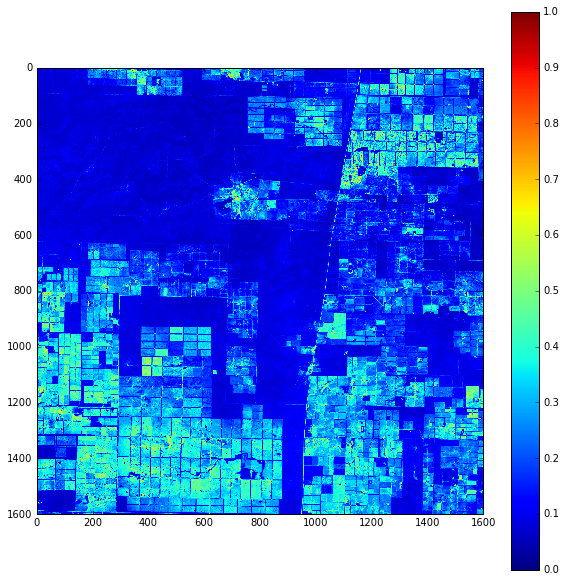

In [10]:
ds4 = gdal.Open('../l8_b4.tif')
nodataval4 = ds4.GetRasterBand(1).GetNoDataValue()
data_b4 = ds4.ReadAsArray()
del ds4
data_b4 = ma.masked_where(data_b4 == nodataval4, data_b4)
print nodataval4
print data_b4.shape, data_b4.dtype

    
cropped_b4 = crop(data_b4)    
normalized_b4 = normalize(cropped_b4)

pl.figure(figsize=(10, 10))
pl.imshow(normalized_b4,interpolation="none")
pl.colorbar()

-9999.0
(7332L, 7142L) int16


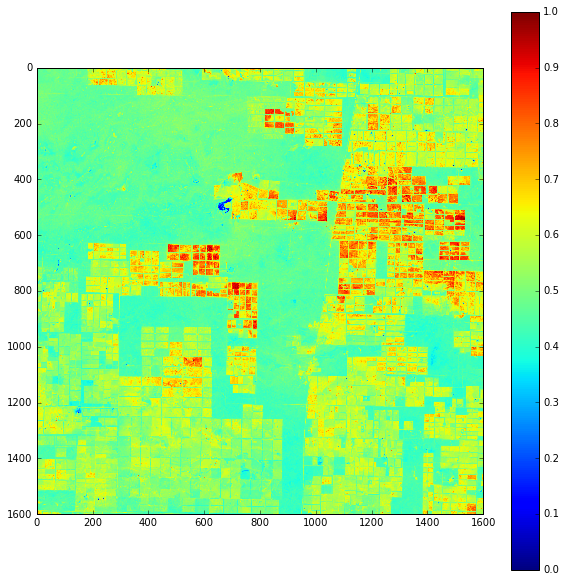

In [11]:
ds5 = gdal.Open('../l8_b5.tif')
nodataval5 = ds5.GetRasterBand(1).GetNoDataValue()
data_b5 = ds5.ReadAsArray()
del ds5
#data_b5 = ma.masked_where(data_b5 == nodataval5, data_b5)
print nodataval5
print data_b5.shape, data_b5.dtype
pl.figure(figsize=(10, 10))
cropped_b5 = crop(data_b5) 
normalized_b5 = normalize(cropped_b5)
pl.imshow(normalized_b5,interpolation="none")
#pl.imshow(data_b5)
pl.colorbar()

-9999.0
(7332L, 7142L) int16


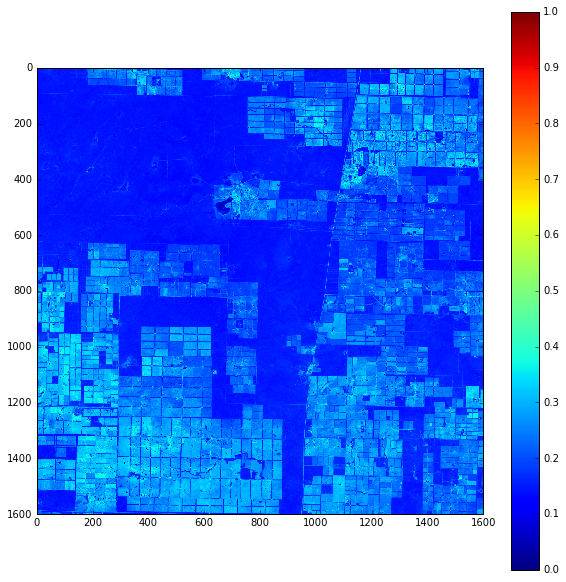

In [12]:
ds6 = gdal.Open('../l8_b6.tif')
nodataval6 = ds6.GetRasterBand(1).GetNoDataValue()
data_b6 = ds6.ReadAsArray()
del ds6
#data_b6 = ma.masked_where(data_b6 == nodataval6, data_b6)
print nodataval6
print data_b6.shape, data_b6.dtype
pl.figure(figsize=(10, 10))
cropped_b6 = crop(data_b6)  
normalized_b6 = normalize(cropped_b6)
pl.imshow(normalized_b6,interpolation="none")
#pl.imshow(data_b6)
pl.colorbar()

-9999.0
(7332L, 7142L) int16


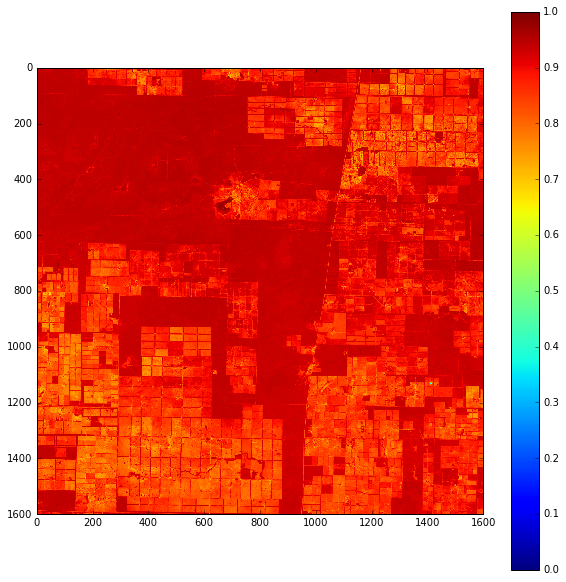

In [13]:
ds7 = gdal.Open('../l8_b7.tif')
nodataval7 = ds7.GetRasterBand(1).GetNoDataValue()
data_b7 = ds7.ReadAsArray()
del ds7
data_b7 = ma.masked_where(data_b7 == nodataval7, data_b7)
print nodataval7
print data_b7.shape, data_b7.dtype
pl.figure(figsize=(10, 10))
cropped_b7 = crop(data_b7)  
normalized_b7 = normalize(cropped_b7)
pl.imshow(normalized_b7,interpolation="none")
#pl.imshow(data_b7)
pl.colorbar()

# Hansen deforestation detections

In [46]:
ds = gdal.Open('../hansen_deforestation_year_resampled.tif')
nodataval = ds.GetRasterBand(1).GetNoDataValue()
data_hansen = ds.ReadAsArray()
del ds

In [47]:
data_hansen = ma.masked_where(data_hansen == nodataval, data_hansen)

C:\Users\Abdullah\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if __name__ == '__main__':


In [48]:
print data_hansen.shape, data_hansen.dtype

(7332L, 7142L) uint8


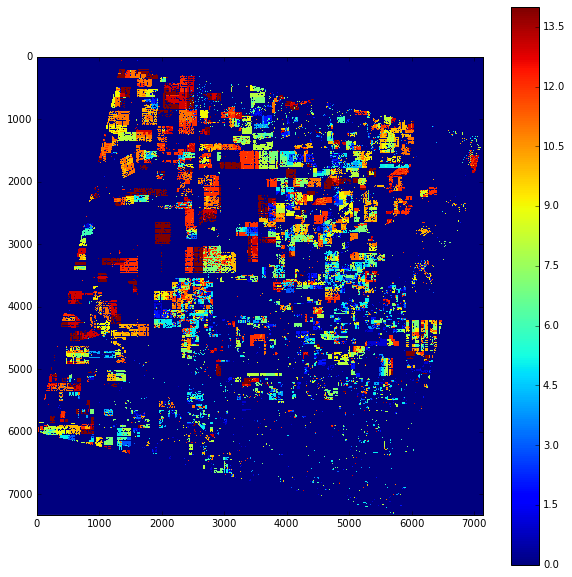

In [49]:
pl.figure(figsize=(10, 10))
data_hansen_cropped = crop(data_hansen) 
normalized_data = normalize(data_hansen_cropped)
pl.imshow(data_hansen,interpolation="none")
#pl.imshow(data_hansen)
pl.colorbar()